In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [2]:
train = pd.read_csv('titanic/train.csv')

In [5]:
test = pd.read_csv('titanic/test.csv')

In [7]:
gender = pd.read_csv('titanic/gender_submission.csv')

In [10]:
# cuidado con hacerlo de esta forma, hay que estar seguro de que esta en orden y completos o la lias

Survived = gender['Survived']
Survived

test['Survived'] = Survived
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [9]:
# mejor con un Join
# test = pd.merge(test, gender, on='PassengerId', how='left')

test = test.merge(
    gender,
    left_on = 'PassengerId',
    right_on = 'PassengerId',
    how = 'left'
)

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [124]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train.size

10692

In [13]:
suma = 0

for i in train:
    suma += sum(train[i].isnull())
    print(suma)

0
0
0
0
0
177
177
177
177
177
864
866


In [13]:
porcentaje_nulos = suma/train.size
porcentaje_nulos

0.08099513655069211

In [15]:
total_celdas = train.shape[0]
total_nulos = train.isnull().sum()
porcentaje_nulos_train = round((total_nulos / total_celdas) * 100,2)
porcentaje_nulos_train

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [17]:
total_celdas = test.shape[0]
total_nulos = test.isnull().sum()
porcentaje_nulos_test = round((total_nulos / total_celdas) * 100,2)
porcentaje_nulos_test

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
Survived        0.00
dtype: float64

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [19]:
train.drop(columns = 'Cabin', axis = 'columns', inplace = True)

In [21]:
test.drop(columns = 'Cabin', axis = 'columns', inplace = True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

In [27]:
# mejor con la mediana que con la media

media_age = train['Age'].median()
media_age

28.0

In [28]:
# Adri - train.Age.fillna(round(train.Age.mean(),0), inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

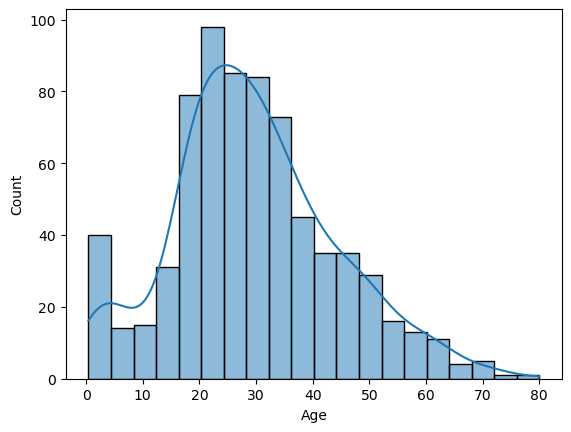

In [23]:
sns.histplot(data=train, x = 'Age', kde=True)

In [31]:
train['Age'].fillna(media_age, inplace = True)

In [33]:
train['Embarked'].ffill(inplace = True)

In [29]:
media_age = test['Age'].median()
media_age

27.0

In [35]:
test['Age'].fillna(media_age, inplace = True)
test['Embarked'].ffill(inplace = True)

In [35]:
media_fare_train = train['Fare'].mean().round(0)
media_fare_train

32.0

In [39]:
media_fare_test = test['Fare'].mean().round(0)
media_fare_test

36.0

In [41]:
# estaria mejor ver en que clase esta esa persona y hacer la media de fare de esa clase

test['Fare'].fillna(media_fare_test, inplace = True)


In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

<Axes: xlabel='Pclass', ylabel='Survived'>

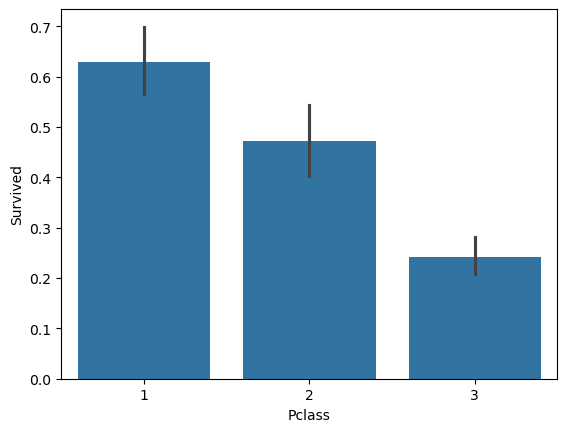

In [38]:
# Para hacer este tienes que hacer un groupby, sino puedes hacer countplot

sns.barplot(data = train, x = 'Pclass', y ='Survived')

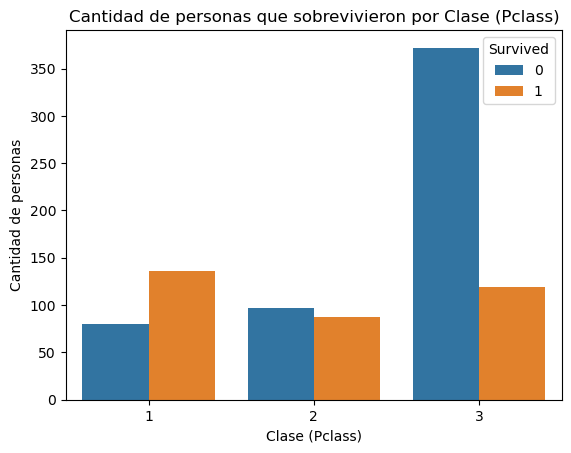

In [44]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Cantidad de personas que sobrevivieron por Clase (Pclass)')
plt.xlabel('Clase (Pclass)')
plt.ylabel('Cantidad de personas')
plt.show()

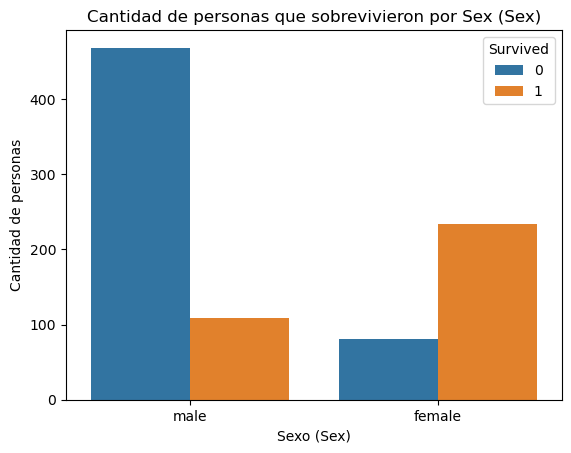

In [40]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Cantidad de personas que sobrevivieron por Sex (Sex)')
plt.xlabel('Sexo (Sex)')
plt.ylabel('Cantidad de personas')
plt.show()

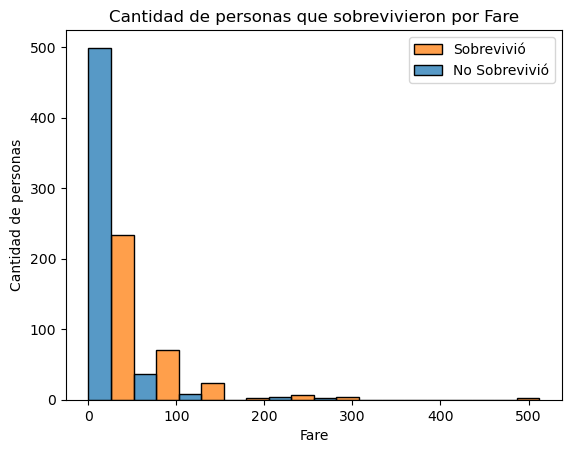

In [41]:
sns.histplot(x='Fare', hue='Survived', data=train, bins = 10, multiple='dodge')
plt.title('Cantidad de personas que sobrevivieron por Fare')
plt.xlabel('Fare')
plt.ylabel('Cantidad de personas')
plt.legend(['Sobrevivió', 'No Sobrevivió'])
plt.show()

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [43]:
for i in train.columns:
    print(f'{i}: {type(train[i][0])}')

PassengerId: <class 'numpy.int64'>
Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>


In [44]:
# tambien se podria hacer 0 y 1 en las columnas

# train.Sex = np.where(train.Sex == 'male', 1, 0)


In [45]:
train = pd.get_dummies(train, 
                         columns = ['Sex','Pclass','Embarked'],
    drop_first = True)

In [47]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,False,True


In [49]:
test = pd.get_dummies(test, 
                         columns = ['Sex','Pclass','Embarked'],
    drop_first = True)

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [51]:
train.drop(columns = "Name", inplace = True, axis = 1)

In [53]:
test.drop(columns = "Name", inplace = True, axis = 1)

In [55]:
train.drop(columns = "Ticket", inplace = True, axis = 1)

In [57]:
test.drop(columns = "Ticket", inplace = True, axis = 1)

In [59]:
X_train = train.loc[:,train.columns != 'Survived']
y_train = train.loc[:,'Survived']

In [61]:
X_test = test.loc[:,test.columns != 'Survived']
y_test = test.loc[:,'Survived']

In [59]:
X_train

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,True,False,True,False,True
1,2,38.0,1,0,71.2833,False,False,False,False,False
2,3,26.0,0,0,7.9250,False,False,True,False,True
3,4,35.0,1,0,53.1000,False,False,False,False,True
4,5,35.0,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,True,True,False,False,True
887,888,19.0,0,0,30.0000,False,False,False,False,True
888,889,30.0,1,2,23.4500,False,False,True,False,True
889,890,26.0,0,0,30.0000,True,False,False,False,False


In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [65]:
modelo = LogisticRegression(max_iter = 1000000)

In [67]:
seleccion_RFE = RFE(modelo, n_features_to_select = 8 )
seleccion_RFE

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=8)

In [69]:
seleccion_RFE.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=8)

In [71]:
seleccion_RFE.support_

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [73]:
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": seleccion_RFE.support_,
    "Posicion": seleccion_RFE.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
1,Age,True,1
2,SibSp,True,1
3,Parch,True,1
5,Sex_male,True,1
6,Pclass_2,True,1
7,Pclass_3,True,1
8,Embarked_Q,True,1
9,Embarked_S,True,1
4,Fare,False,2
0,PassengerId,False,3


In [75]:
X_train_final = X_train.loc[:,seleccion_RFE.support_]
X_train_final

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,True,False,True,False,True
1,38.0,1,0,False,False,False,False,False
2,26.0,0,0,False,False,True,False,True
3,35.0,1,0,False,False,False,False,True
4,35.0,0,0,True,False,True,False,True
...,...,...,...,...,...,...,...,...
886,27.0,0,0,True,True,False,False,True
887,19.0,0,0,False,False,False,False,True
888,27.0,1,2,False,False,True,False,True
889,26.0,0,0,True,False,False,False,False


In [77]:
X_test_final = X_test.loc[:,seleccion_RFE.support_]
X_test_final

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,34.5,0,0,True,False,True,True,False
1,47.0,1,0,False,False,True,False,True
2,62.0,0,0,True,True,False,True,False
3,27.0,0,0,True,False,True,False,True
4,22.0,1,1,False,False,True,False,True
...,...,...,...,...,...,...,...,...
413,27.0,0,0,True,False,True,False,True
414,39.0,0,0,False,False,False,False,False
415,38.5,0,0,True,False,True,False,True
416,27.0,0,0,True,False,True,False,True


7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [83]:
filtro_age = X_train_final['Age'] <= 16
X_train_final.loc[:,'IsMinor'] = np.where(filtro_age, 1, 0)

In [85]:
X_train_final

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,IsMinor
0,22.0,1,0,True,False,True,False,True,0
1,38.0,1,0,False,False,False,False,False,0
2,26.0,0,0,False,False,True,False,True,0
3,35.0,1,0,False,False,False,False,True,0
4,35.0,0,0,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,True,True,False,False,True,0
887,19.0,0,0,False,False,False,False,True,0
888,27.0,1,2,False,False,True,False,True,0
889,26.0,0,0,True,False,False,False,False,0


In [87]:
filtro_age = X_test_final['Age'] <= 16
X_test_final.loc[:,'IsMinor'] = np.where(filtro_age, 1, 0)

C:\Users\deepn\AppData\Local\Temp\ipykernel_3040\1866477767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final.loc[:,'IsMinor'] = np.where(filtro_age, 1, 0)


In [89]:
X_test_final

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,IsMinor
0,34.5,0,0,True,False,True,True,False,0
1,47.0,1,0,False,False,True,False,True,0
2,62.0,0,0,True,True,False,True,False,0
3,27.0,0,0,True,False,True,False,True,0
4,22.0,1,1,False,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...
413,27.0,0,0,True,False,True,False,True,0
414,39.0,0,0,False,False,False,False,False,0
415,38.5,0,0,True,False,True,False,True,0
416,27.0,0,0,True,False,True,False,True,0


8. Ajustar modelo considerando todas las variables del dataset de testing.

In [ ]:
# Ajustamos con train el modelo

In [91]:
modelo = LogisticRegression(max_iter = 1000000)
modelo.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [93]:
y_prediction = modelo.predict(X_test_final)

In [95]:
y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
# calculas la probabilidad de que cada elemento sea 0(no) o 1(si) 

y_prediction_proba = modelo.predict_proba(X_test_final)
y_prediction_proba

array([[0.8851719 , 0.1148281 ],
       [0.61839901, 0.38160099],
       [0.8146213 , 0.1853787 ],
       [0.90652348, 0.09347652],
       [0.49954968, 0.50045032],
       [0.73696225, 0.26303775],
       [0.33545944, 0.66454056],
       [0.81705474, 0.18294526],
       [0.26355115, 0.73644885],
       [0.94469863, 0.05530137],
       [0.90652348, 0.09347652],
       [0.65781034, 0.34218966],
       [0.10360796, 0.89639204],
       [0.90605024, 0.09394976],
       [0.16977088, 0.83022912],
       [0.14851397, 0.85148603],
       [0.69814854, 0.30185146],
       [0.84059893, 0.15940107],
       [0.50183296, 0.49816704],
       [0.40473683, 0.59526317],
       [0.68033259, 0.31966741],
       [0.73518797, 0.26481203],
       [0.08188001, 0.91811999],
       [0.42614535, 0.57385465],
       [0.15434806, 0.84565194],
       [0.9598071 , 0.0401929 ],
       [0.05251094, 0.94748906],
       [0.84531887, 0.15468113],
       [0.63057745, 0.36942255],
       [0.92512499, 0.07487501],
       [0.

In [129]:
y_pred_proba = modelo.predict_proba(X_test_final)[:,1]
y_pred_proba

array([0.1148281 , 0.38160099, 0.1853787 , 0.09347652, 0.50045032,
       0.26303775, 0.66454056, 0.18294526, 0.73644885, 0.05530137,
       0.09347652, 0.34218966, 0.89639204, 0.09394976, 0.83022912,
       0.85148603, 0.30185146, 0.15940107, 0.49816704, 0.59526317,
       0.31966741, 0.26481203, 0.91811999, 0.57385465, 0.84565194,
       0.0401929 , 0.94748906, 0.15468113, 0.36942255, 0.07487501,
       0.12375874, 0.15529673, 0.40868437, 0.44354703, 0.45983236,
       0.16752608, 0.58590515, 0.6200336 , 0.09758383, 0.09347652,
       0.09972369, 0.44969667, 0.06883622, 0.81630081, 0.83682539,
       0.09758383, 0.45929214, 0.13423045, 0.89082608, 0.4784319 ,
       0.38107754, 0.35673015, 0.71314003, 0.75225412, 0.35673015,
       0.11358736, 0.07855984, 0.09758383, 0.06746477, 0.935216  ,
       0.11565932, 0.23594721, 0.11325006, 0.70552861, 0.64608941,
       0.82675439, 0.72489037, 0.33685908, 0.54230012, 0.69832426,
       0.69555567, 0.10628349, 0.57432523, 0.55700955, 0.93664

In [103]:
# Esto no te sirve a no ser que quieras cambiar a mano el threshold 
# para no hacerlo a mano usas la curva de ROC que ve la sensibilidad y especificidad segun cambia el threshold

y_pred_final = (y_prediction_proba[:,1] > 0.5)*1
y_pred_final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

10. Calcular matriz de confusión

In [99]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [105]:
matriz_confusion = confusion_matrix(y_test, y_pred_final)
matriz_confusion

array([[253,  13],
       [ 15, 137]], dtype=int64)

In [100]:
pd.DataFrame({
    "y_test": y_test,
    "y_pred_final": y_pred_final
}).groupby(["y_test", "y_pred_final"]).size().reset_index()

,y_test,y_pred_final,0
0,0,0,253
1,0,1,13
2,1,0,14
3,1,1,138


In [109]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

11. Calcular Accuracy

In [115]:
(TP + TN) / (TP +TN + FP + FN)

0.9330143540669856

12. Calcular sensibilidad

In [113]:
TP / (TP + FN)

0.9013157894736842

13. Calcular especificidad

In [117]:
TN / (TN + FP)

0.9511278195488722

14. Graficar curva de ROC

In [131]:
roc_curve(y_test, y_pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0037594 ,
        0.0037594 , 0.0037594 , 0.0037594 , 0.0037594 , 0.0037594 ,
        0.0037594 , 0.0037594 , 0.0075188 , 0.0075188 , 0.0075188 ,
        0.0075188 , 0.0075188 , 0.0075188 , 0.0075188 , 0.0075188 ,
        0.0075188 , 0.0075188 , 0.0112782 , 0.0112782 , 0.02631579,
        0.02631579, 0.03007519, 0.03007519, 0.03383459, 0.03383459,
        0.04135338, 0.04135338, 0.04887218, 0.04887218, 0.05263158,
        0.05263158, 0.05263158, 0.05639098, 0.05639098, 0.06766917,
        0.07518797, 0.09774436, 0.09774436, 0.10150376, 0.10150376,
        0.10902256, 0.10902256, 0.11654135, 0.11654135, 0.12406015,
        0.12406015, 0.13157895, 0.13157895, 0.13909774, 0.14285714,
        0.15413534, 0.15789474, 0.16917293, 0.19172932, 0.19924812,
        0.23308271, 0.2406015 , 0.26315789, 0.27

In [135]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

<Axes: >

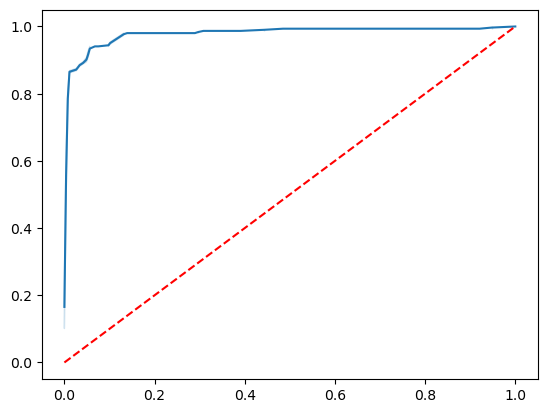

In [137]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x


sns.lineplot(x=especificidad_inv, y=sensibilidad)
sns.lineplot(x= recta_x, y=recta_y, color='red', ls = '--')

15. Calcular valor de área bajo la curva de ROC

In [ ]:
roc_auc_score(test_data["Survived"], test_data["y_pred_proba"])